In [18]:
import numpy as np
import matplotlib.pyplot as plt

data = 100*np.random.rand(10000)

In [6]:
def bin_width_weights(data,bins):
    edge_lo,edge_hi = bins[:-1],bins[1:]
    weights = np.array([1.]*len(data))
    for lo,hi in zip(edge_lo,edge_hi):
        width = hi - lo
        in_bin = (data > lo) & (data < hi)
        weights = weights * np.where(in_bin == True,1/width,1)
    return weights

In [13]:
def plot_data(data,bins,weights=None,figax=None):
    fig,ax=figax
    ax.hist(data,bins=bins,weights=weights)
    ax.set_ylabel("counts" if weights is None else "counts/bin width")

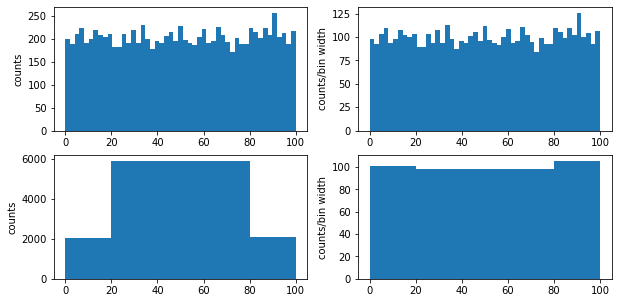

In [22]:
linear_bins = np.linspace(0,100,50)
linear_weights = bin_width_weights(data,linear_bins)

varied_bins = [0,20,80,100]
varied_weights = bin_width_weights(data,varied_bins)

fig , axs = plt.subplots(nrows=2,ncols=2,figsize=(10,5))
plot_data(data,linear_bins,weights=None,figax=(fig,axs[0,0]))
plot_data(data,linear_bins,weights=linear_weights,figax=(fig,axs[0,1]))
plot_data(data,varied_bins,weights=None,figax=(fig,axs[1,0]))
plot_data(data,varied_bins,weights=varied_weights,figax=(fig,axs[1,1]))